# Trabalho Inteligência Artificial
#### -> Classificação do conjunto de dados pela Árvore de Decisão e Naive Bayes


### Integrantes:

- Gabriel Paiva de Oliveira
- Larissa Maria Carvalho
- Maria Clara Martins Santana
- Rafael Hadzic Rico de Sousa
- Rodrigo Nascimento Pereira (rodrigonpgmae@gmail.com)

Quaisquer dúvidas entre em contato com Rodrigo, pelo email acima

# Configurações iniciais
- Bibliotecas
  - Pandas: análise e manipulação de dados
  - Sklearn: aprendizado de maquina em Python
    - Treinamento
    - Árvore de Decisão
    - Naive Bayes
    - Relatório de Classificação e Matriz de Confusão
  - Seaborn: visualização de dados
  - Matplotlib: criação de gráficos em Python



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

- Carregamento do arquivo "celulares.csv" que contém os dados



In [ ]:
dados = pd.read_csv("celulares.csv", sep=',')
dados.head(20)

,capacidade_bateria,bluetooth,velocidade_clock,memoria,nucleos,resolucao_camera,ram,tempo_chamada,touch_screen,wifi,faixa_valores
0,842,0,22,7,2,2,2549,19,0,1,1
1,1021,1,5,53,3,6,2631,7,1,0,2
2,563,1,5,41,5,6,2603,9,1,0,2
3,615,1,25,10,6,9,2769,11,0,0,2
4,1821,1,12,44,2,14,1411,15,1,0,1
5,1859,0,5,22,1,7,1067,10,0,0,1
6,1821,0,17,10,8,10,3220,18,0,1,3
7,1954,0,5,24,4,0,700,5,1,1,0
8,1445,1,5,53,7,14,1099,20,0,0,0
9,509,1,6,9,5,15,513,12,0,0,0


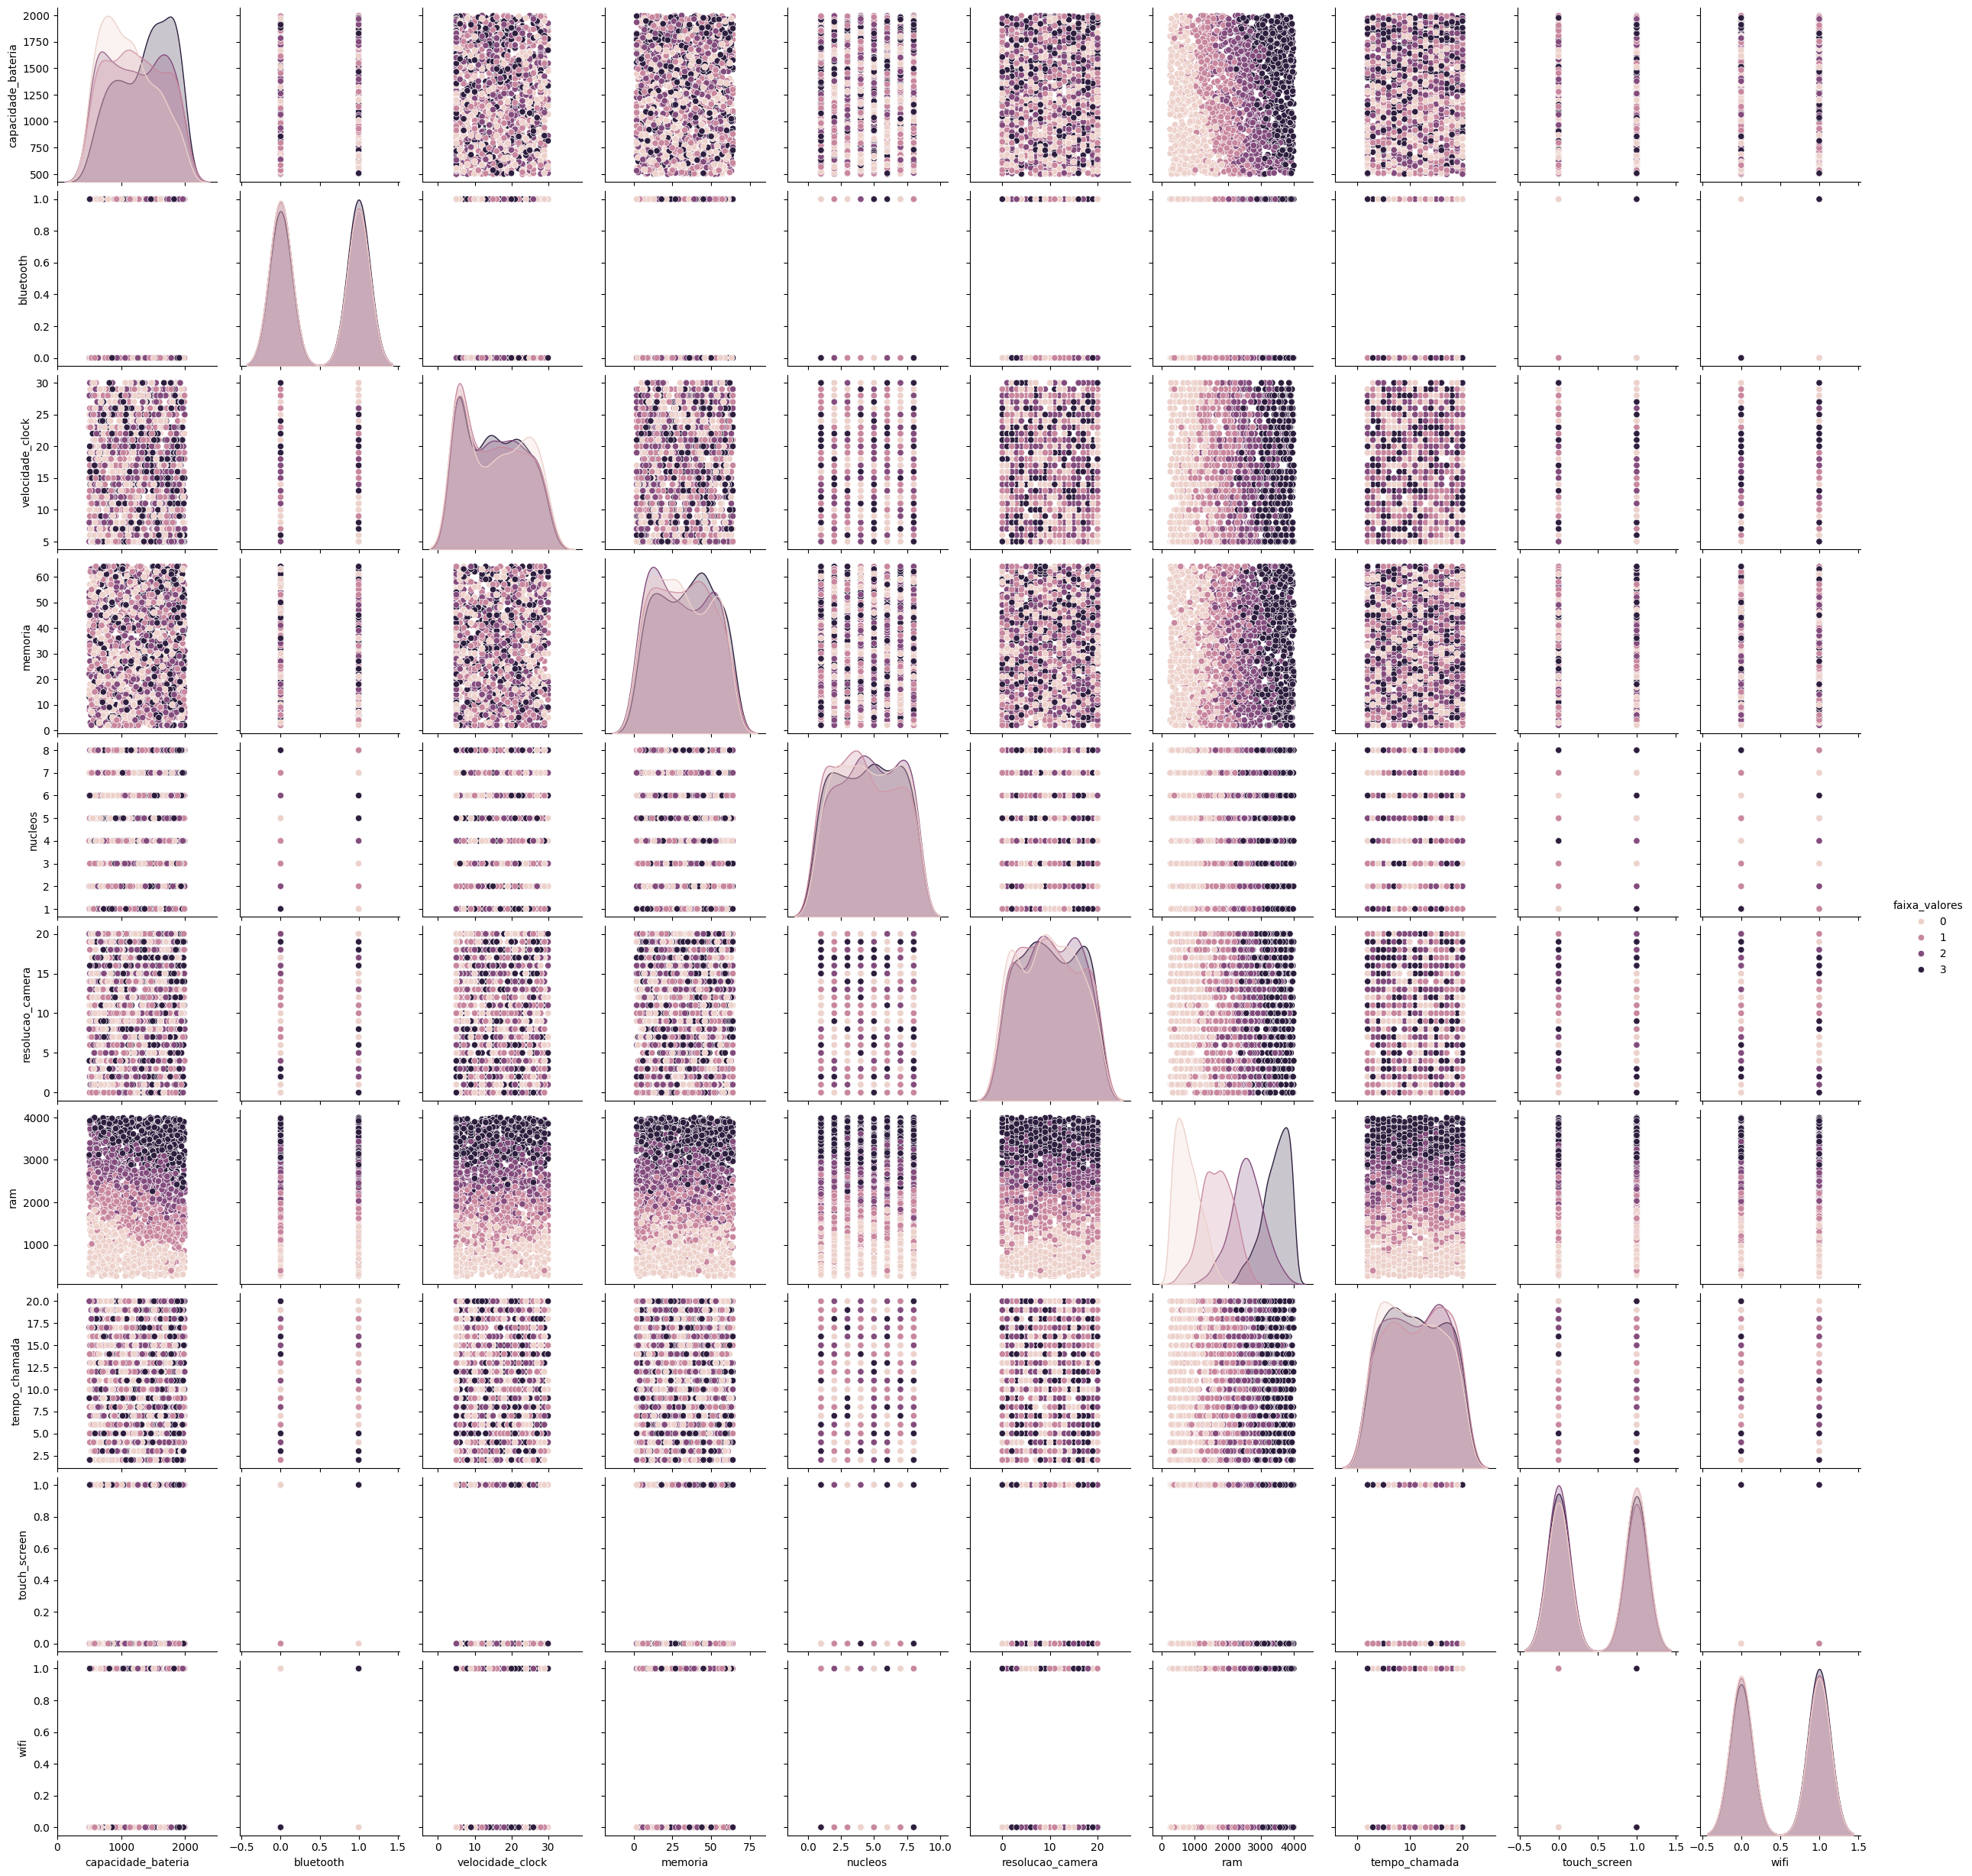

In [ ]:
# Pairplot for feature relationships
sns.pairplot(dados, hue='faixa_valores')
plt.show()

**Mapa de calor da correlação 2 a 2 das variáveis**

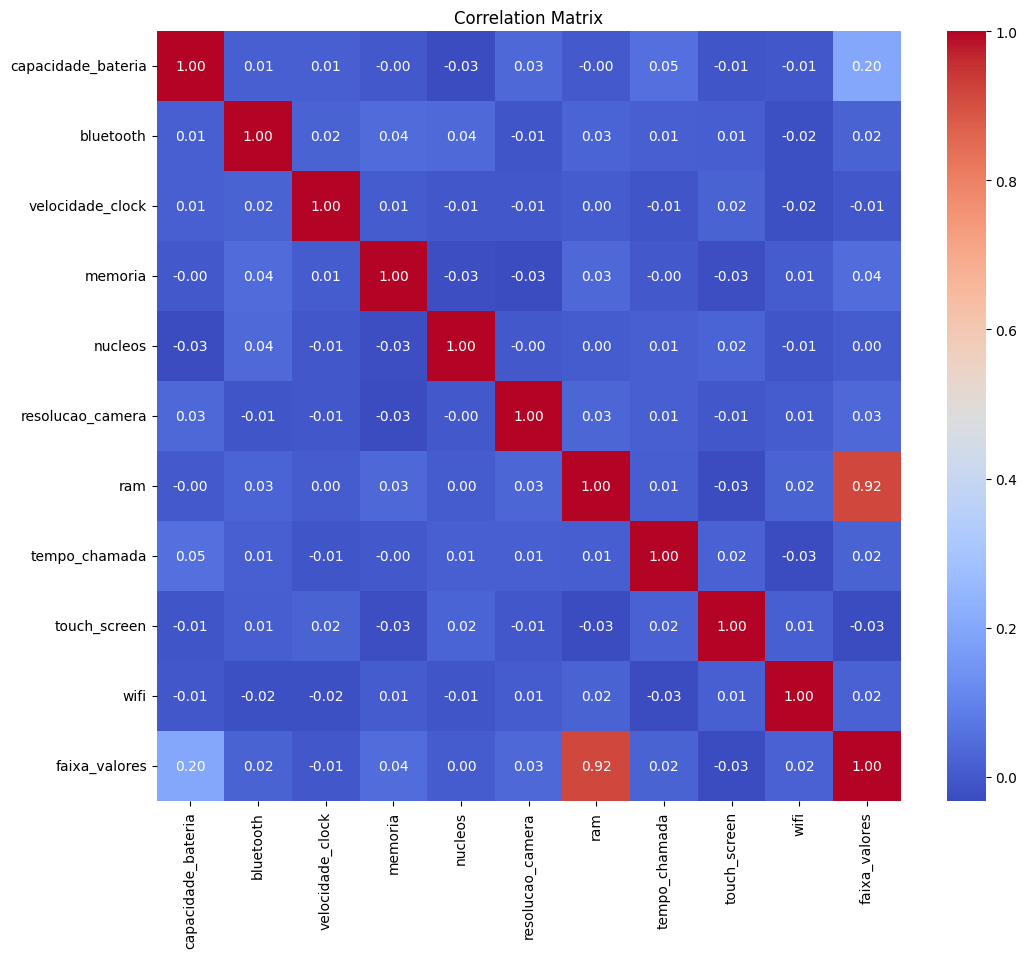

In [ ]:
# Correlation matrix heatmap
correlation_matrix = dados.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df1 = dados
df2 = dados[['faixa_valores']]
df1.tail()

,capacidade_bateria,bluetooth,velocidade_clock,memoria,nucleos,resolucao_camera,ram,tempo_chamada,touch_screen,wifi,faixa_valores
1995,794,1,5,2,6,14,668,19,1,0,0
1996,1965,1,26,39,4,3,2032,16,1,1,2
1997,1911,0,9,36,8,3,3057,5,1,0,3
1998,1512,0,9,46,5,5,869,19,1,1,0
1999,510,1,20,45,6,16,3919,2,1,1,3


# Usando o modelo de Árvore de decisões

Este modelo necessita de dois inputs.

**Entradas:**
X -> capacidade de bateria e resolução da câmera.

**Saída:**
Y -> faixa de valores

Então é feita a separação de 20% dos dados para o teste.

In [ ]:
Y = df2
X = df1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print(len(Y), X.shape)

2000 (2000, 11)


**Treinando o DecisionTreeClassifier**

É criada uma classe e inserida no modelo de Árvore de Decisão

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

**Relatório de classificação**

É feita uma previsão nos dados de teste

In [ ]:
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00       106

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



**Regras da árvore de decisões**

Regras da árvore de decisão:
|--- faixa_valores <= 1.50
|   |--- faixa_valores <= 0.50
|   |   |--- class: 0
|   |--- faixa_valores >  0.50
|   |   |--- class: 1
|--- faixa_valores >  1.50
|   |--- faixa_valores <= 2.50
|   |   |--- class: 2
|   |--- faixa_valores >  2.50
|   |   |--- class: 3



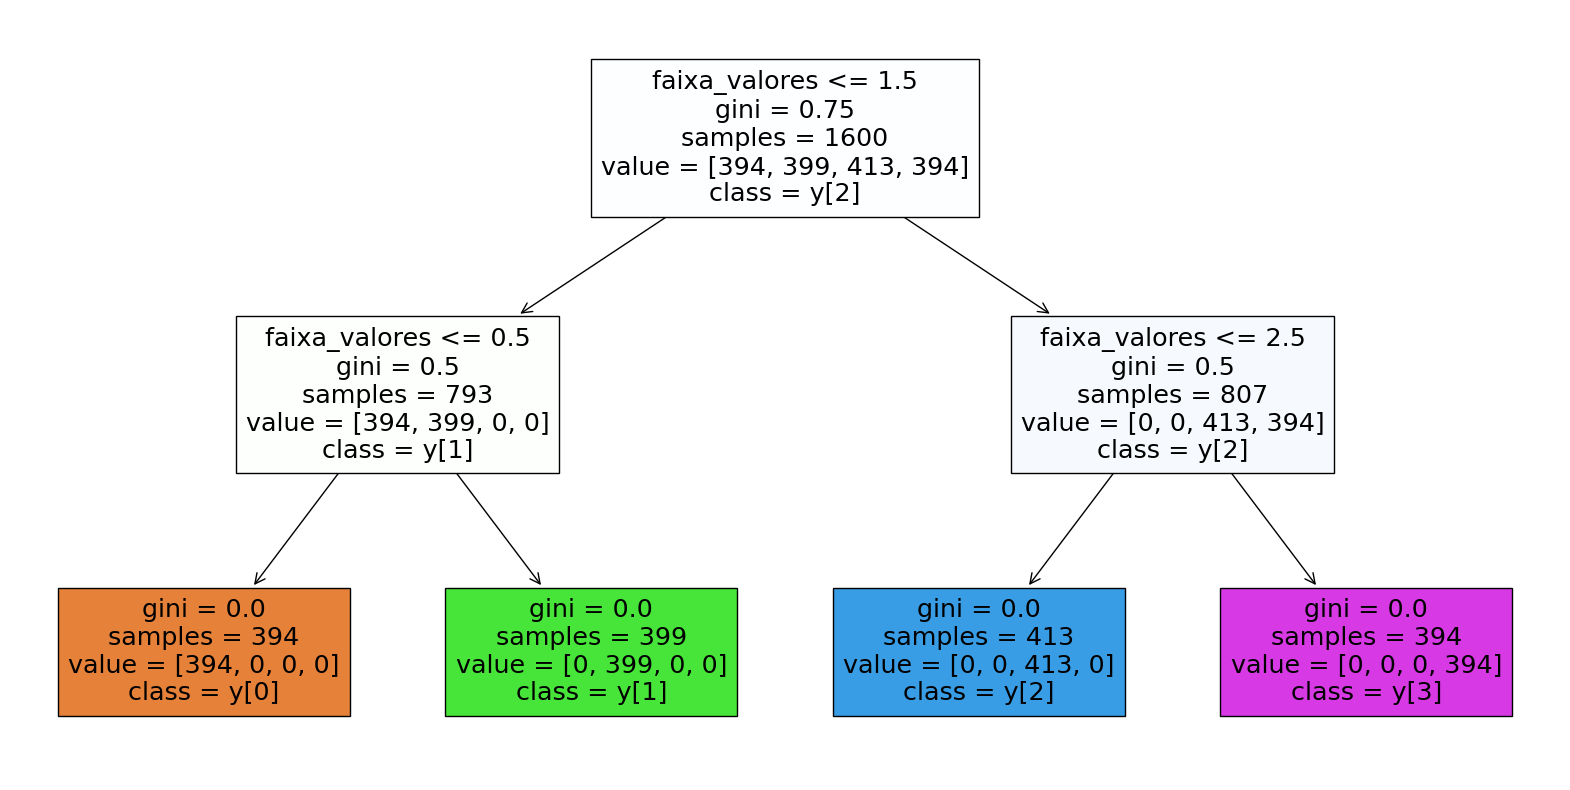

In [ ]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Imprimindo as regras da árvore de decisão
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Regras da árvore de decisão:")
print(tree_rules)

# Plotando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()

**Matriz de Confusão**

Matriz de Confusão:
[[106   0   0   0]
 [  0 101   0   0]
 [  0   0  87   0]
 [  0   0   0 106]]


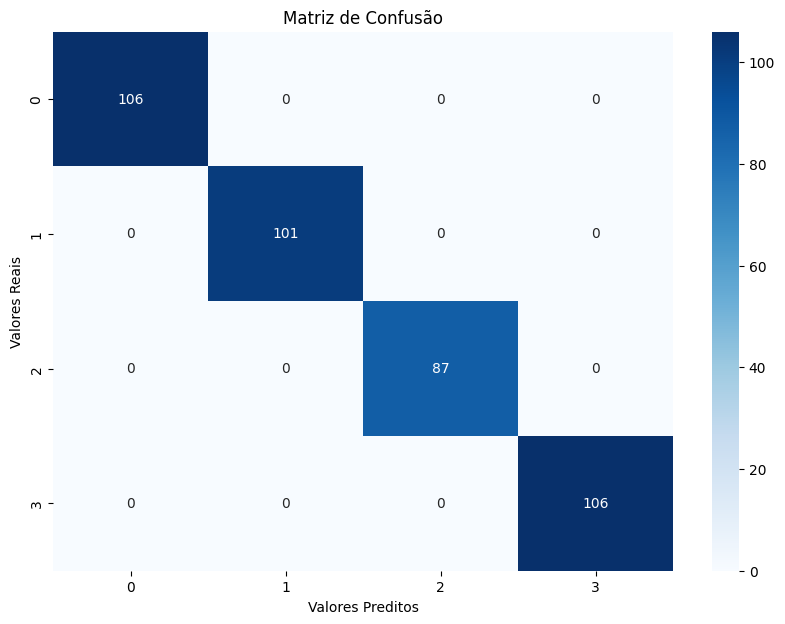

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print('Matriz de Confusão:')
print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

# Usando o modelo Navie Bayes


**Treinando o Naives Bayes Classifier**

É criada outra classe e inserido no modelo de Naives Bayes


In [ ]:
clf = MultinomialNB()  # Use MultinomialNB for Naive Bayes
clf.fit(X_train, Y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

**Relatório de classificação**

É feita novamente a previsão nos dados de teste

In [ ]:
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       106
           1       0.31      0.28      0.29       101
           2       0.20      0.15      0.17        87
           3       0.51      0.65      0.58       106

    accuracy                           0.46       400
   macro avg       0.43      0.45      0.43       400
weighted avg       0.44      0.46      0.45       400



**Matriz de confusão**


Matriz de Confusão:
[[75 21  8  2]
 [31 28 15 27]
 [ 4 34 13 36]
 [ 0  7 30 69]]


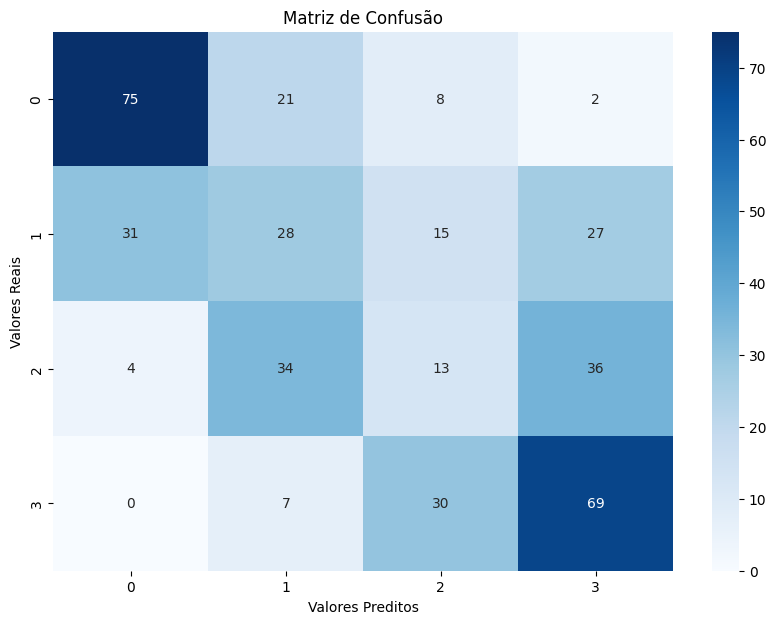

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print('Matriz de Confusão:')
print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()